In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.stats

## Random integer between 1 and 10

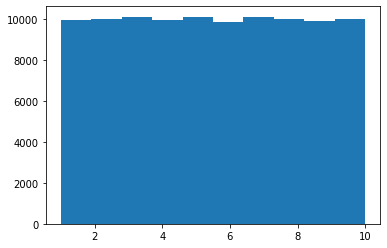

In [2]:
num_experiments = 100000

random_integers = np.random.randint(low=1, high=11, size=num_experiments)

plt.hist(random_integers, bins=10)
plt.show()

## Random number between 0 and 1

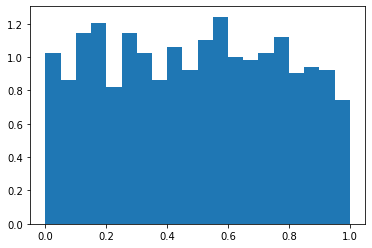

In [3]:
values = []
num_experiments = 1000
for i in range(num_experiments):
    values.append(random.random())

plt.hist(values ,bins=20, density=True)
plt.show()

## Normal Distribution

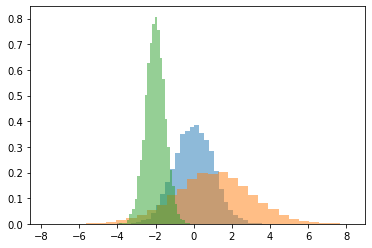

In [4]:
# np.random.normal(mean, std dev, size)
ndst = np.random.normal(0,1,10000)
ndst2 = np.random.normal(1,2,10000)
ndst3 = np.random.normal(-2,0.5,10000)

# if we don't call .show, it will put them all on the same plot!
plt.hist(ndst, bins=30, alpha=0.5, density=True)
plt.hist(ndst2, bins=30, alpha=0.5, density=True)
plt.hist(ndst3, bins=30, alpha=0.5, density=True)
plt.show()

## Central Limit Theorem

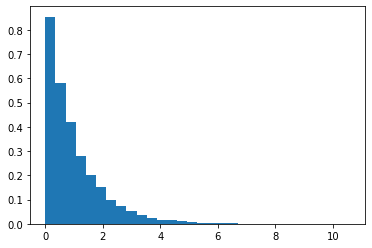

In [5]:
# exponential distribution
expdst = np.random.exponential(scale=1, size=10000)
plt.hist(expdst, bins=30, density=True)
plt.show()

In [6]:
sample_size = 5
num_experiments = 1000

sample_means = []
for i in range(num_experiments):
    for j in range(sample_size):
        sample = np.random.exponential(scale=1, size=sample_size)
        sample_means.append(np.mean(sample))

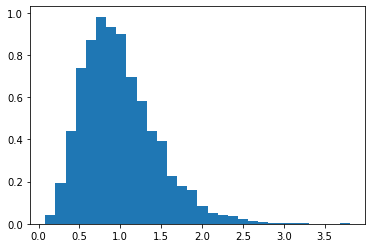

In [7]:
plt.hist(sample_means, bins=30, density=True)
plt.show()

## Hypothesis Testing

Let's take a look at a real dataset. Here is a master dataset of all the events and results from the Olympics. It can be found nicely pre-cleaned [here](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv) on Kaggle. You'll need a free account, which I encourage you to make if you have not done so already.

In [8]:
# the observations are various census tracts, or subregions of the USA
df = pd.read_csv('data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

Take a second, play with the data. Explore it!
- If you need a guiding question, try "What is the mean height of an Olympic athlete from United States? Standard deviation?"

In [10]:
# get dataframe of USA athletes only
df_usa = df[(df['NOC'] == 'USA')]

# calucale mean for all USA athletes
pop_mean = df_usa['Height'].mean()

Let's compare whether the mean height of Olympic athletes from another country differ from the United States. Suppose for the Netherlands our data is corrupted, and we have just a random sample of Olympic athletes rather than the whole population.

In [11]:
# sample 0.5% of the athletes from the Netherlands
df_sample = df[df['Team'] == 'Netherlands'].sample(frac=0.005)
df_sample.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
58810,30091,John Drost,M,25.0,185.0,95.0,Netherlands,NED,1984 Winter,1984,Winter,Sarajevo,Bobsleigh,Bobsleigh Men's Two,NaN
191997,96404,Johannes Jacobus Posthumus,M,20.0,NaN,NaN,Netherlands,NED,1908 Summer,1908,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,NaN
23179,12193,Jessica Blaszka,F,23.0,160.0,52.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Women's Flyweight, Freestyle",NaN
95415,48310,Johannes Hendricus Heuckelbach,M,27.0,NaN,NaN,Netherlands,NED,1920 Summer,1920,Summer,Antwerpen,Boxing,Boxing Men's Welterweight,NaN
249473,124915,Diederik van Silfhout,M,28.0,190.0,87.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN


This sets up the Hypothesis Test:

$H_0: \mu_{\text{NED}} = 176$

$H_a: \mu_{\text{NED}} \neq 176$

We *know* that means drawn from random samples are normally distributed by the Central Limit Theorem. By the Null Hypothesis we assume that this is a normal distribution has mean 176. Note that this is the mean of the distribution of the random variable $X$ where $X$ is the mean of a random sample of Netherlands Olympic athlete heights. Let's set a significance level of $\alpha = 0.05$.

In [12]:
sample_mean = df_sample['Height'].mean()
sample_mean

180.42105263157896

How unusual is this result? Is it far enough away from the assumed fact to reject the Null Hypothesis?

We estimate the standard deviation of this distribution to be $\sigma_m = \frac{\sigma_{\text{sample}}}{\sqrt{n}}$. This is also known as the standard eror.

In [13]:
std_error = scipy.stats.sem(df_sample['Height'], nan_policy='omit')
std_error

2.449866674345428

(remember this is the *sampling* distribution)

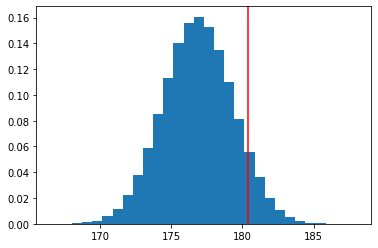

In [14]:
ndst = np.random.normal(pop_mean, std_error, 100000)

plt.hist(ndst, bins=30, density=True)

# vertical line
plt.axvline(x=sample_mean, color='red')
plt.show()

Seems a bit unusual, but we can't be too sure! Time for statistics!
1. How many standard deviations away from the population mean is our sample?
2. What is the likelihood we draw a random sample from this population this far from the mean?

Good news is that we know a lot about the standard normal distribution (remember mean 0 and std dev 1). We can convert our value to the standard normal as follows:

$$
Z = \frac{\bar{x} - \mu}{\sigma_m}
$$

This is known as a **z-score**.

In [15]:
z = (sample_mean - pop_mean) / (std_error)
z

1.442588493650274

Assuming this distribution, our sample mean is about z standard deviations away from the regular mean. What's the likelihood of this occurring?

$$
P(Z < z) + P(Z > z)
$$

This is known as the **p-value**, the probability of obtaining this sample assuming that the null hypothesis is true.

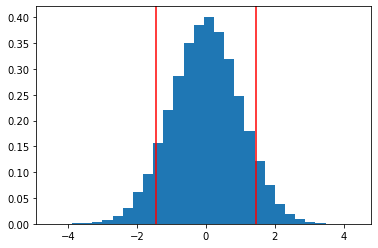

In [16]:
import scipy.stats

# this function gives the area under the standard normal distribution
# to the left of the z value given
def p_left_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)

ndst = np.random.normal(0, 1, 100000)
plt.hist(ndst, bins=30, density=True)

# In this plot we want the area to the left of left-most red line
# and the right of the right-most red line
plt.axvline(x=-z, color='red')
plt.axvline(x=z, color='red')
plt.show()

In [17]:
# since the distribution is symmetric we can just find
# 2 times the area left of the left-most red line
p = 2*p_left_of_z(-z)
p

0.14913642661316975

This indicates that if the null hypothesis was true, this result would occur about *p*% of the time. Since we chose a significance level of $\alpha=0.05$, if $p<\alpha$ we reject the null hypothesis. Note that if we had been stricter before our experiment and chosen $\alpha=0.01$ we may have gotten different results.

## Confidence Interval

In [18]:
conf_lvl = 0.95
deg_of_freedom = len(df_sample) - 1

confidence_interval = scipy.stats.t.interval(conf_lvl, deg_of_freedom, sample_mean, std_error)
confidence_interval

(175.40272823940361, 185.4393770237543)